In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

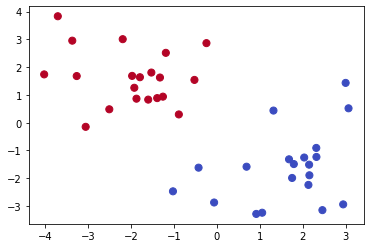

In [129]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

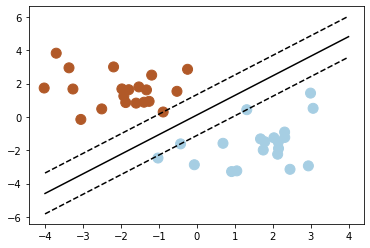

The seperating hyperplane(line) is: x2 = 1.1774373623419114 x1 + 0.11181536076015833


In [130]:
# your code here
from sklearn import svm

clf=svm.SVC(kernel='linear',C=100000)
clf.fit(X,Y)
k=-clf.coef_[0][0]/clf.coef_[0][1]
clf.coef_
clf.intercept_
w=clf.coef_[0]
x1=np.linspace(-4,4)
x2=a*x1-(clf.intercept_[0])/w[1]

b=clf.support_vectors_[0]
x2_down=a*x1+(b[1]-a*b[0])

b=clf.support_vectors_[-1]
x2_up=a*x1+(b[1]-a*b[0])


plt.gca()
plt.plot(x1,x2,'k-')
plt.plot(x1,x2_down,'k--')
plt.plot(x1,x2_up,'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired,s=100)

plt.axis('tight')
plt.show()

print('The seperating hyperplane(line) is: x2 = {} x1 + {}'.format(k,-(clf.intercept_[0]) / w[1]))


#### b. List the support vectors.

In [131]:
# your code here
clf.support_vectors_

array([[-0.42627536, -1.61810965],
       [ 1.3180363 ,  0.43600617],
       [-0.88564585,  0.2969359 ]])

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [132]:
# your code here
k=-clf.coef_[0][0]/clf.coef_[0][1]
b_lower=clf.support_vectors_[0][1]-k*clf.support_vectors_[0][0]
b_lower
equation_lower='lower hyperplanes(lines) of the margin is: (x2={} x1{})'.format(k,b_lower)
print(equation_lower)

b_upper=clf.support_vectors_[2][1]-k*clf.support_vectors_[2][0]
b_upper
equation_upper='upper hyperplanes(lines) of the margin is: (x2={} x1+{})'.format(k,b_upper)
print(equation_upper)

lower hyperplanes(lines) of the margin is: (x2=1.1774373623419114 x1-1.116197106957939)
upper hyperplanes(lines) of the margin is: (x2=1.1774373623419114 x1+1.3397284161253722)


#### d. Compute the width of the margin.

In [133]:
# your code here
margin_width=(b_upper-b_lower)/np.sqrt(k**2+1)
margin_width

1.5898176953798933

#### e. What would you expect to happen to the margin if the constant C was made very small?

The margin would be larger if the constant C was made very small. I would expect to get misclassified samples if the C is very small.

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following questions:

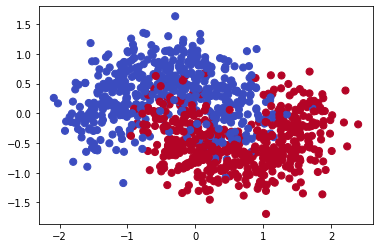

In [134]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [135]:
# your code here
IS=[]
OS=[]
clf=svm.SVC(kernel='poly')
clf.fit(X_train,Y_train)
print("In sample, we successfully predict {} percent of the data".format(100*(clf.predict(X_train)==Y_train).sum()/len(Y_train)))

correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data".format(correct))

In sample, we successfully predict 83.28358208955224 percent of the data
Out of sample, we successfully predict 0.8575757575757575 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


            0         1
0    0.000045  0.761261
1    0.000048  0.761261
2    0.000051  0.761261
3    0.000054  0.761261
4    0.000058  0.761261
..        ...       ...
195  5.805432  0.828829
196  6.166278  0.828829
197  6.549554  0.828829
198  6.956653  0.828829
199  7.389056  0.828829

[200 rows x 2 columns]
             0         1
0     0.000045  0.603604
1     0.000049  0.603604
2     0.000052  0.603604
3     0.000056  0.603604
4     0.000060  0.603604
..         ...       ...
195  41.206374  0.599099
196  44.209722  0.599099
197  47.431970  0.599099
198  50.889074  0.599099
199  54.598150  0.599099

[200 rows x 2 columns]
              0         1
0      0.000045  0.738739
1      0.000049  0.738739
2      0.000053  0.738739
3      0.000058  0.738739
4      0.000063  0.738739
..          ...       ...
195  292.478734  0.864865
196  316.965828  0.864865
197  343.503046  0.864865
198  372.262031  0.864865
199  403.428793  0.864865

[200 rows x 2 columns]
               0         1
0

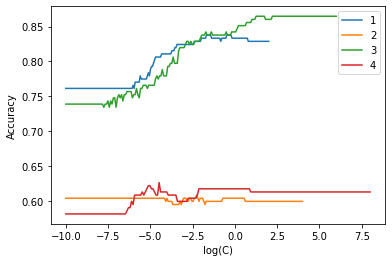

In [136]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)
import math
# your code here
for i in range(1,5):
    C=[math.exp(i)for i in np.linspace(-10,2*i,200)]
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=i) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    temp=pd.DataFrame([C,OS_validation]).T # put results together.
    print(temp)

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,label=i)
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.legend()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [137]:
# your code here
from sklearn.model_selection import train_test_split
OS = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

    clf = svm.SVC(kernel='poly', degree=3, C=100) 
    clf.fit(X_train, Y_train)

    correct = 1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
    OS.append(correct)

print(OS)
print("Out of sample, we successfully predict {} percent of the data".format((np.mean(OS))*100))

[0.8696969696969697, 0.8696969696969697, 0.8696969696969697, 0.8696969696969697, 0.8696969696969697, 0.8696969696969697, 0.8696969696969697, 0.8696969696969697, 0.8696969696969697, 0.8696969696969697]
Out of sample, we successfully predict 86.96969696969697 percent of the data


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

SUV,red,imported,yes

sports,yellow,domestic,no

sports,red,imported,no

SUV,red,domestic,yes

SUV,red,imported,yes

sports,yellow,domestic,no

SUV,red,imported,yes

SUV,yellow,domestic,yes

sports,yellow,imported,no

sports,red,imported,yes


### Questions:

a) Calculate the following sample probabilities:

P(Yes) 7/11

P(No)4/11

P(Red|Yes)6/7

P(SUV|Yes)5/7

P(Domestic|Yes)3/7

P(Red|No)1/4

P(SUV|No)0

P(Domestic|No)1/2

b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

P(red,domestic,SUV)=(P(red,domestic,SUV|yes))P(yes)+(P(red,domestic,SUV|no))P(no)=7/11 * (6/7 * 3/5)+0=18/55

P(yes|((red,domestic,SUV))=P(yes)P((red,domestic,SUV|yes))/P(red,domestic,SUV)=(7/11 * 6/7 * 1 * 3/5)/(6/7 * 1 * 3/5) * 7/11=1

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if the monthly rent of an apartment in Brazil is lower than $600 or not. The variables are:

y: The label (1 - rent is lower than 600 USD, 0 - rent is higher or equal to 600 USD)

city: Apartment location (1 - city, 0 - otherwise)

area: Code number for each area

rooms: Number of rooms

bathroom: Number of bathrooms

parking_spaces: Number of parking spaces

floor: Apartment floor

animal: 1 - if animals are allowed, 0 - if animals are not allowed 

furniture: 1 - if apartment is furnished, 0 - if apartment is unfurnished 

Original dataset "brazilian_houses_to_rent" available in: https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent.

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [92]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   city  area  rooms  bathroom  parking_spaces  floor  animal  furniture
0     1   240      3         3               4      0       1          1
1     0    64      2         1               1     10       1          0
2     1   443      5         5               4      3       1          1
3     1    73      2         2               1     12       1          0
4     1    19      1         1               0      0       0          0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [93]:
# your code here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.8137254901960784
Out of sample prediction accuracy: 0.7996070726915521


### b) What is the prior probability of "rent lower than 600 USD", learned from the training data?

In [94]:
# your code here
prior_prob=y_train.sum()*1.0/y_train.count()
prior_prob

0.5049019607843137

### c) What is the mean and variance of of each input for apartments with rent lower than 600 USD?

In [95]:
# your code here
data_train_1=data_train.loc[data_train['y']==1]
for i in data_train.columns:
    print('For input variable',i,', the mean is:',data_train_1[i].mean())
    print('For input variable',i,', the variance is:',data_train_1[i].var())

For input variable Label , the mean is: 98.75728155339806
For input variable Label , the variance is: 3358.9503141062246
For input variable y , the mean is: 1.0
For input variable y , the variance is: 0.0
For input variable city , the mean is: 0.6990291262135923
For input variable city , the variance is: 0.21245002855511097
For input variable area , the mean is: 70.54368932038835
For input variable area , the variance is: 2230.1132686084134
For input variable rooms , the mean is: 1.8737864077669903
For input variable rooms , the variance is: 0.9937178754997136
For input variable bathroom , the mean is: 1.5145631067961165
For input variable bathroom , the variance is: 0.6051779935275089
For input variable parking_spaces , the mean is: 1.029126213592233
For input variable parking_spaces , the variance is: 1.538359032933563
For input variable floor , the mean is: 5.29126213592233
For input variable floor , the variance is: 34.52217780316007
For input variable animal , the mean is: 0.74757

### d) What is the mean and variance of each input variable for apartments with rent higher than 600 USD?

In [96]:
# your code here
data_train_2=data_train[data_train['y']==0]
for i in data_train.columns:
    print('For input variable',i,', the mean is:',data_train_2[i].mean())
    print('For input variable',i,', the variance is:',data_train_2[i].var())

For input variable Label , the mean is: 104.29702970297029
For input variable Label , the variance is: 3632.77089108911
For input variable y , the mean is: 0.0
For input variable y , the variance is: 0.0
For input variable city , the mean is: 0.9603960396039604
For input variable city , the variance is: 0.038415841584158346
For input variable area , the mean is: 212.5148514851485
For input variable area , the variance is: 22072.432277227734
For input variable rooms , the mean is: 2.9405940594059405
For input variable rooms , the variance is: 1.2164356435643566
For input variable bathroom , the mean is: 3.099009900990099
For input variable bathroom , the variance is: 1.9300990099009896
For input variable parking_spaces , the mean is: 2.4653465346534653
For input variable parking_spaces , the variance is: 2.0712871287128714
For input variable floor , the mean is: 4.732673267326732
For input variable floor , the variance is: 26.617821782178197
For input variable animal , the mean is: 0.80

## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [97]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  2  1  3
1  2  1  4
2  2  5  5
3  5  4  5
4  4  4  6
5  3  5  1
6  3  4  4
7  1  1  2
8  1  4  1
0    0
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    0
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [98]:
# your code here
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1 
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred


In [99]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)
# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

In sample prediction accuracy: 1.0
Out of sample prediction accuracy: 0.7222222222222222


### b) Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer). 

In [100]:
# your code here
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [101]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
for i,j in naive_bayes_classifier.items():
    print(i)
    print(j)
    print()
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
prior
0.5213758375944582

0_1
{2: 0.1049009441445481, 5: 0.